## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=60, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 21s 425us/step - loss: 1.9290 - acc: 0.3054 - val_loss: 1.7459 - val_acc: 0.3707
Epoch 2/60
50000/50000 [==============================] - 21s 423us/step - loss: 1.6915 - acc: 0.3929 - val_loss: 1.6343 - val_acc: 0.4172
Epoch 3/60
50000/50000 [==============================] - 22s 441us/step - loss: 1.5972 - acc: 0.4280 - val_loss: 1.5608 - val_acc: 0.4501
Epoch 4/60
50000/50000 [==============================] - 23s 454us/step - loss: 1.5303 - acc: 0.4547 - val_loss: 1.5116 - val_acc: 0.4626
Epoch 5/60
50000/50000 [==============================] - 24s 477us/step - loss: 1.4969 - acc: 0.4664 - val_loss: 1.4863 - val_acc: 0.4719
Epoch 6/60
50000/50000 [==============================] - 22s 438us/step - loss: 1.4543 - acc: 0.4807 - val_loss: 1.4941 - val_acc: 0.4709
Epoch 7/60
50000/50000 [==============================] - 20s 391us/step - loss: 1.4268 - acc: 0.4910 - val_loss: 1.

50000/50000 [==============================] - 21s 417us/step - loss: 0.5531 - acc: 0.8014 - val_loss: 1.9896 - val_acc: 0.4999
Epoch 60/60
50000/50000 [==============================] - 23s 458us/step - loss: 0.5477 - acc: 0.8034 - val_loss: 2.0116 - val_acc: 0.5104


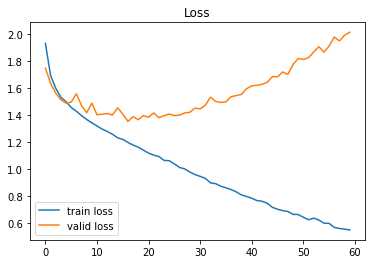

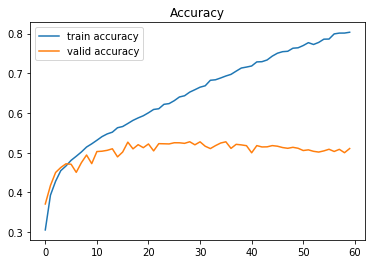

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [11]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=50, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 313us/step - loss: 2.2637 - acc: 0.1384 - val_loss: 2.2117 - val_acc: 0.1934
Epoch 2/50
50000/50000 [==============================] - 16s 311us/step - loss: 2.1798 - acc: 0.2081 - val_loss: 2.1482 - val_acc: 0.2331
Epoch 3/50
50000/50000 [==============================] - 16s 316us/step - loss: 2.1246 - acc: 0.2399 - val_loss: 2.0999 - val_acc: 0.2598
Epoch 4/50
50000/50000 [==============================] - 17s 333us/step - loss: 2.0802 - acc: 0.2629 - val_loss: 2.0594 - val_acc: 0.2727
Epoch 5/50
50000/50000 [==============================] - 16s 329us/step - loss: 2.0428 - acc: 0.2817 - val_loss: 2.0252 - val_acc: 0.2947
Epoch 6/50
50000/50000 [==============================] - 17s 337us/step - loss: 2.0115 - acc: 0.2944 - val_loss: 1.9962 - val_acc: 0.3043
Epoch 7/50
50000/50000 [==============================] - 17s 333us/step - loss: 1.9846 - acc: 0.3053 - val_loss: 1.

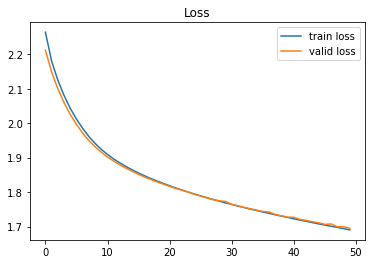

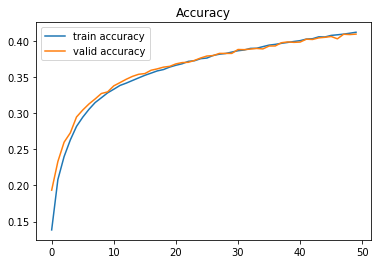

In [13]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()